# Singapore Flat Resale Price Prediction

In [4]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob

# Combining Multiple CSV Files

In [5]:
 # Load your data
#df1 = pd.read_csv(r"C:\Users\manik\Desktop\Singapore Analysis\ResaleFlatPricesBasedonApprovalDate19901999.csv")
#df2 = pd.read_csv(r"C:\Users\manik\Desktop\Singapore Analysis\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv(r"C:\Users\manik\Desktop\Singapore Analysis\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
#df4 = pd.read_csv(r"C:\Users\manik\Desktop\Singapore Analysis\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
#df5 = pd.read_csv(r"C:\Users\manik\Desktop\Singapore Analysis\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")


df=pd.concat([df3], ignore_index=True)
df


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [6]:
df.head(7)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
5,2015-01,ANG MO KIO,3 ROOM,603,ANG MO KIO AVE 5,07 TO 09,67.0,New Generation,1980,64,290000.0
6,2015-01,ANG MO KIO,3 ROOM,709,ANG MO KIO AVE 8,01 TO 03,68.0,New Generation,1980,64,290000.0


In [7]:
df.shape

(37153, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


In [9]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,37153.0,97.020386,24.198360,31.0,74.0,96.0,111.0,280.0
lease_commence_date,37153.0,1990.920195,10.862330,1966.0,1984.0,1989.0,2000.0,2013.0
remaining_lease,37153.0,73.913116,10.885456,48.0,66.0,72.0,83.0,97.0
resale_price,37153.0,436862.789032,135805.154660,190000.0,340000.0,408000.0,495000.0,1150000.0


In [11]:
df['resale_price'].value_counts()

resale_price
380000.0    606
400000.0    590
350000.0    541
360000.0    541
420000.0    518
           ... 
902500.0      1
238888.0      1
558500.0      1
698888.0      1
395333.0      1
Name: count, Length: 1748, dtype: int64

# Data Cleaning

In [12]:
df.nunique()

month                    24
town                     26
flat_type                 7
block                  2108
street_name             519
storey_range             17
floor_area_sqm          156
flat_model               20
lease_commence_date      48
remaining_lease          50
resale_price           1748
dtype: int64

In [13]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

## REMAINING_LEASE

In [14]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [15]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [16]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0
37152,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,70,735000.0


In [17]:
df['remaining_lease'].value_counts()

remaining_lease
68    2328
67    1857
69    1635
71    1547
84    1423
70    1337
81    1335
80    1317
85    1314
83    1312
72    1190
86    1168
61    1166
82    1140
62    1068
63    1042
79    1029
95    1026
60     876
87     866
66     842
76     820
64     726
75     622
78     615
59     577
77     554
58     532
65     527
94     523
88     515
93     451
73     443
57     427
92     346
89     308
56     296
91     294
53     270
52     243
54     207
74     192
55     181
90     177
51     152
50     138
96     107
49      88
97       3
48       1
Name: count, dtype: int64

In [18]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

## Wrong Formate

In [19]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease          int64
resale_price           float64
dtype: object

In [20]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month
0,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,2015,01
1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,2015,01


In [21]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
37151,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0,2016,12,1,3
37152,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,70,735000.0,2016,12,10,12


In [22]:
df.drop('storey_range', axis = 1, inplace= True)

In [23]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [24]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,3 ROOM,174.0,ANG MO KIO AVE 4,60.0,Improved,1986,70,255000.0,2015,1,7,9
1,ANG MO KIO,3 ROOM,541.0,ANG MO KIO AVE 10,68.0,New Generation,1981,65,275000.0,2015,1,1,3
2,ANG MO KIO,3 ROOM,163.0,ANG MO KIO AVE 4,69.0,New Generation,1980,64,285000.0,2015,1,1,3
3,ANG MO KIO,3 ROOM,446.0,ANG MO KIO AVE 10,68.0,New Generation,1979,63,290000.0,2015,1,1,3
4,ANG MO KIO,3 ROOM,557.0,ANG MO KIO AVE 10,68.0,New Generation,1980,64,290000.0,2015,1,7,9


In [25]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease          int64
resale_price           float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

## TEXT ERRORS

In [26]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [27]:
df['town'].value_counts()

town
JURONG WEST        2888
TAMPINES           2666
SENGKANG           2619
WOODLANDS          2599
BEDOK              2442
YISHUN             2154
HOUGANG            1909
ANG MO KIO         1851
CHOA CHU KANG      1770
PUNGGOL            1550
BUKIT BATOK        1501
BUKIT PANJANG      1398
BUKIT MERAH        1365
PASIR RIS          1185
KALLANG/WHAMPOA    1145
TOA PAYOH          1095
GEYLANG            1032
SEMBAWANG          1014
QUEENSTOWN          971
CLEMENTI            933
JURONG EAST         832
SERANGOON           826
BISHAN              685
CENTRAL AREA        410
MARINE PARADE       225
BUKIT TIMAH          88
Name: count, dtype: int64

In [28]:
df['flat_type'].value_counts()

flat_type
4 ROOM              15190
3 ROOM              10021
5 ROOM               8735
EXECUTIVE            2840
2 ROOM                348
1 ROOM                 14
MULTI-GENERATION        5
Name: count, dtype: int64

In [29]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [30]:
df['flat_type'].value_counts()

flat_type
4 ROOM              15190
3 ROOM              10021
5 ROOM               8735
EXECUTIVE            2840
2 ROOM                348
1 ROOM                 14
MULTI GENERATION        5
Name: count, dtype: int64

In [31]:
df['street_name'].value_counts()

street_name
YISHUN RING RD         620
BEDOK RESERVOIR RD     507
ANG MO KIO AVE 10      473
ANG MO KIO AVE 3       445
HOUGANG AVE 8          343
                      ... 
BT MERAH LANE 1          1
KRETA AYER RD            1
JLN DUSUN                1
TAO CHING RD             1
TELOK BLANGAH ST 31      1
Name: count, Length: 519, dtype: int64

In [32]:
df['flat_model'].value_counts()

flat_model
Model A                   11143
Improved                   9511
New Generation             6328
Premium Apartment          3526
Simplified                 1872
Apartment                  1422
Standard                   1181
Maisonette                 1036
Model A2                    576
DBSS                        205
Type S1                     137
Model A-Maisonette           70
Type S2                      55
Adjoined flat                50
Terrace                      24
Multi Generation              5
Premium Apartment Loft        5
Improved-Maisonette           4
Premium Maisonette            2
2-room                        1
Name: count, dtype: int64

In [33]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [34]:
df['flat_model'].value_counts()

flat_model
Model A                   11143
Improved                   9511
New Generation             6328
Premium Apartment          3526
Simplified                 1872
Apartment                  1422
Standard                   1181
Maisonette                 1036
Model A2                    576
DBSS                        205
Type S1                     137
Model A-Maisonette           70
Type S2                      55
Adjoined flat                50
Terrace                      24
Multi Generation              5
Premium Apartment Loft        5
Improved-Maisonette           4
Premium Maisonette            2
2-room                        1
Name: count, dtype: int64

## Duplicates

In [35]:
df.duplicated().sum()

51

In [36]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Outliers

In [37]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price']

In [38]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'remaining_lease',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

## Using Boxplot

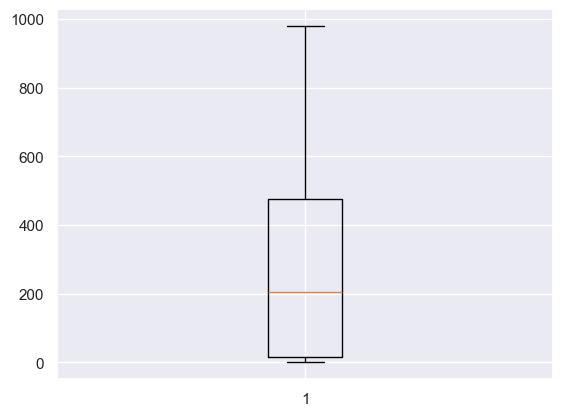

In [39]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

In [40]:
        # IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-670.0, 1162.0)

In [41]:
# Filter the dataframe to remove outliers
df_filtered = df[(df['floor_area_sqm'] >= lower_bound) & (df['floor_area_sqm'] <= upper_bound)]

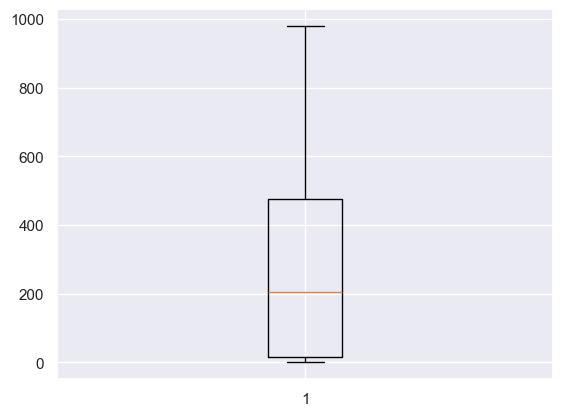

In [42]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

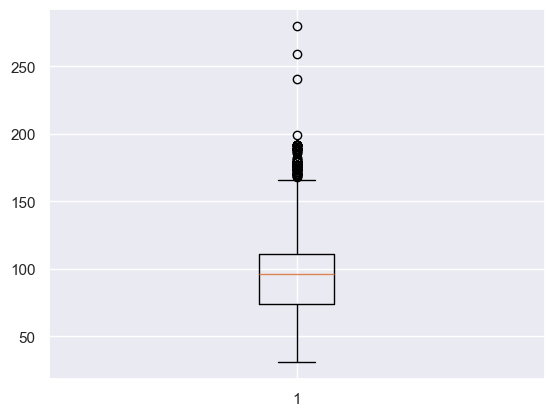

In [43]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [44]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_filtered = df[(df['floor_area_sqm'] >= lower_bound) & (df['floor_area_sqm'] <= upper_bound)]


In [45]:
df_filtered

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,3 ROOM,174.0,ANG MO KIO AVE 4,60.0,Improved,1986,70,255000.0,2015,1,7,9
1,ANG MO KIO,3 ROOM,541.0,ANG MO KIO AVE 10,68.0,New Generation,1981,65,275000.0,2015,1,1,3
2,ANG MO KIO,3 ROOM,163.0,ANG MO KIO AVE 4,69.0,New Generation,1980,64,285000.0,2015,1,1,3
3,ANG MO KIO,3 ROOM,446.0,ANG MO KIO AVE 10,68.0,New Generation,1979,63,290000.0,2015,1,1,3
4,ANG MO KIO,3 ROOM,557.0,ANG MO KIO AVE 10,68.0,New Generation,1980,64,290000.0,2015,1,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37147,YISHUN,5 ROOM,166.0,YISHUN RING RD,121.0,Improved,1987,70,410000.0,2016,12,4,6
37148,YISHUN,5 ROOM,297.0,YISHUN ST 20,112.0,Improved,2000,82,488000.0,2016,12,13,15
37149,YISHUN,5 ROOM,838.0,YISHUN ST 81,122.0,Improved,1987,69,455000.0,2016,12,1,3
37151,YISHUN,EXECUTIVE,325.0,YISHUN CTRL,146.0,Maisonette,1988,70,575000.0,2016,12,1,3


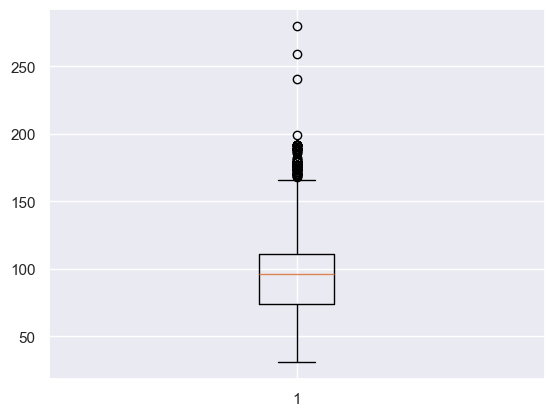

In [46]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

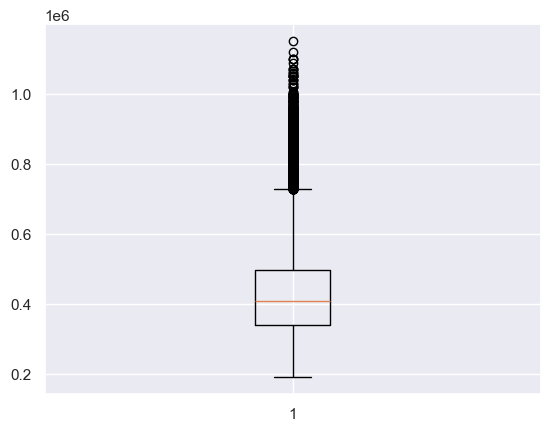

In [47]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [48]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(107500.0, 727500.0)

In [49]:
# Filter the dataframe to remove outliers
df_filtered = df[(df['resale_price'] >= lower_bound) & (df['resale_price'] <= upper_bound)]

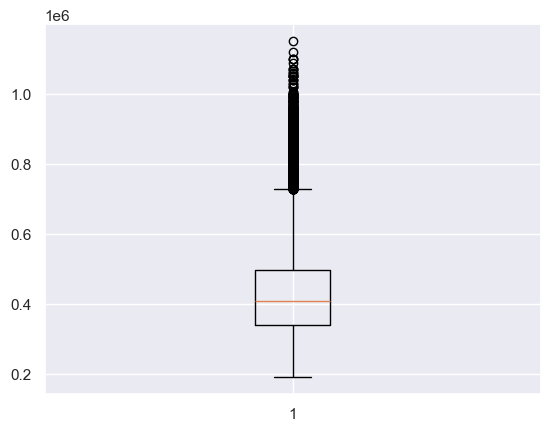

In [50]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

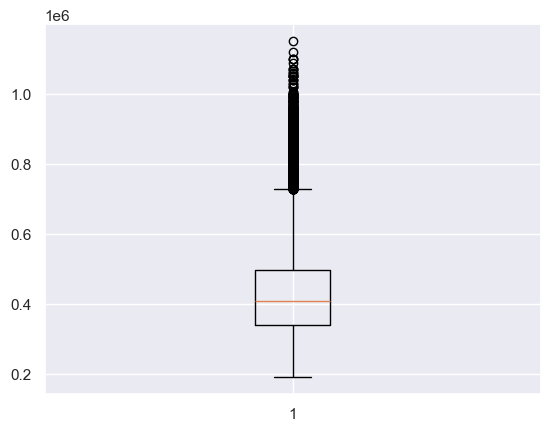

In [51]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

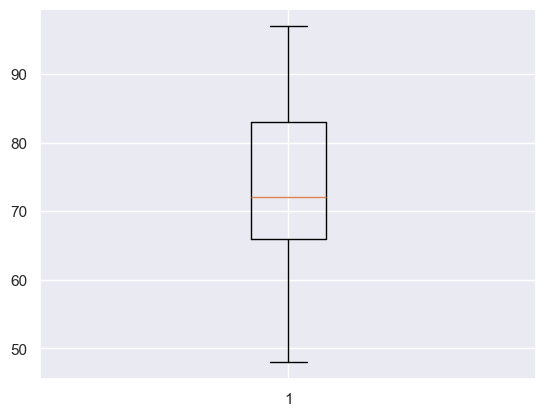

In [52]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [53]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(40.5, 108.5)

In [54]:
# Filter the dataframe to remove outliers
df_filtered = df[(df['remaining_lease'] >= lower_bound) & (df['remaining_lease'] <= upper_bound)]

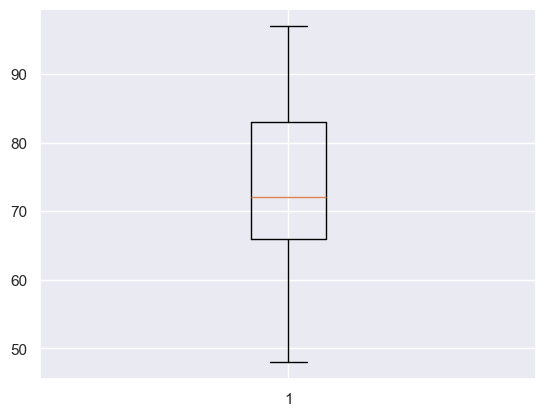

In [55]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

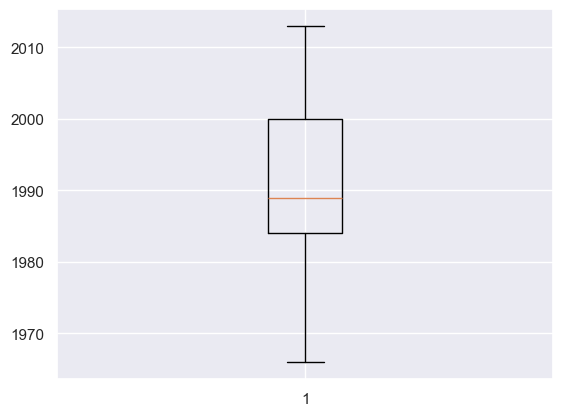

In [56]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

In [57]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1960.0, 2024.0)

In [58]:
df_filtered = df[(df['lease_commence_date'] >= lower_bound) & (df['lease_commence_date'] <= upper_bound)]

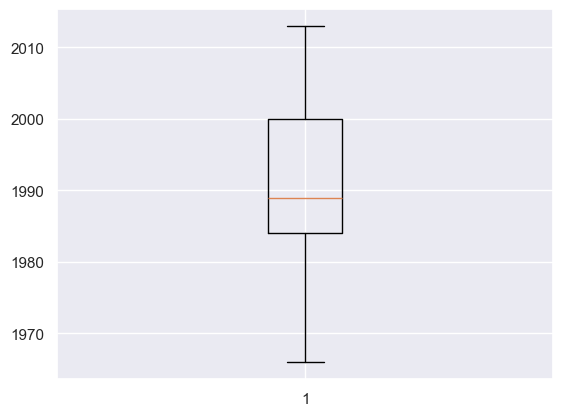

In [59]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

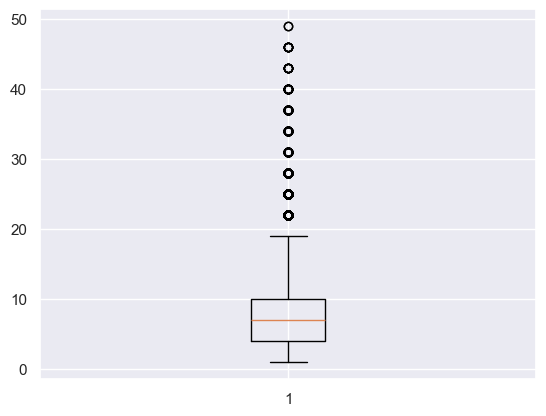

In [60]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [61]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

In [62]:
df_filtered = df[(df['storey_lower_bound'] >= lower_bound) & (df['storey_lower_bound'] <= upper_bound)]

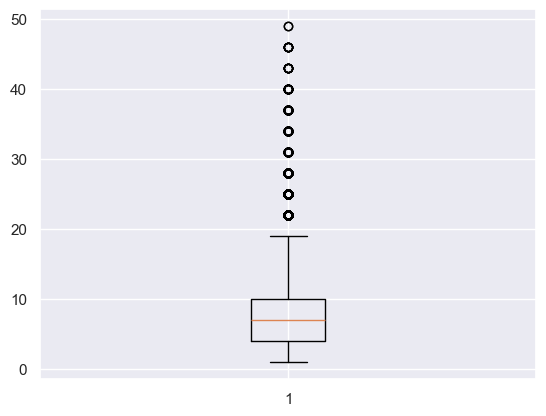

In [63]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

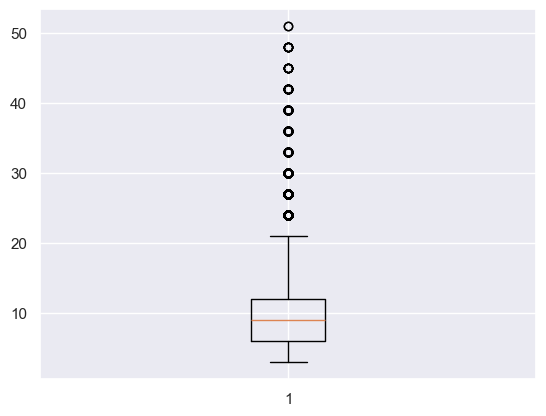

In [64]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [65]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

In [66]:
df_filtered = df[(df['storey_upper_bound'] >= lower_bound) & (df['storey_upper_bound'] <= upper_bound)]

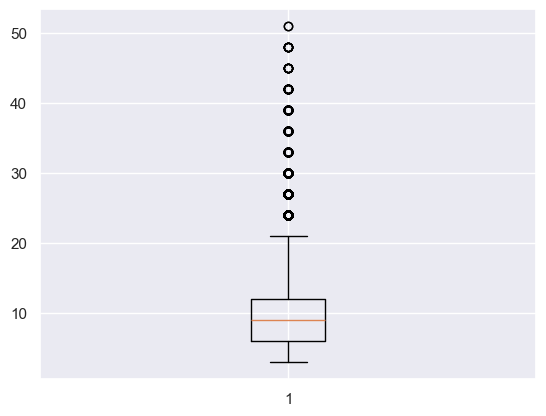

In [67]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

# EDA - EXPLORATARY DATA ANALYSIS

### Categorical Vs Frequency using BarPlot

In [68]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

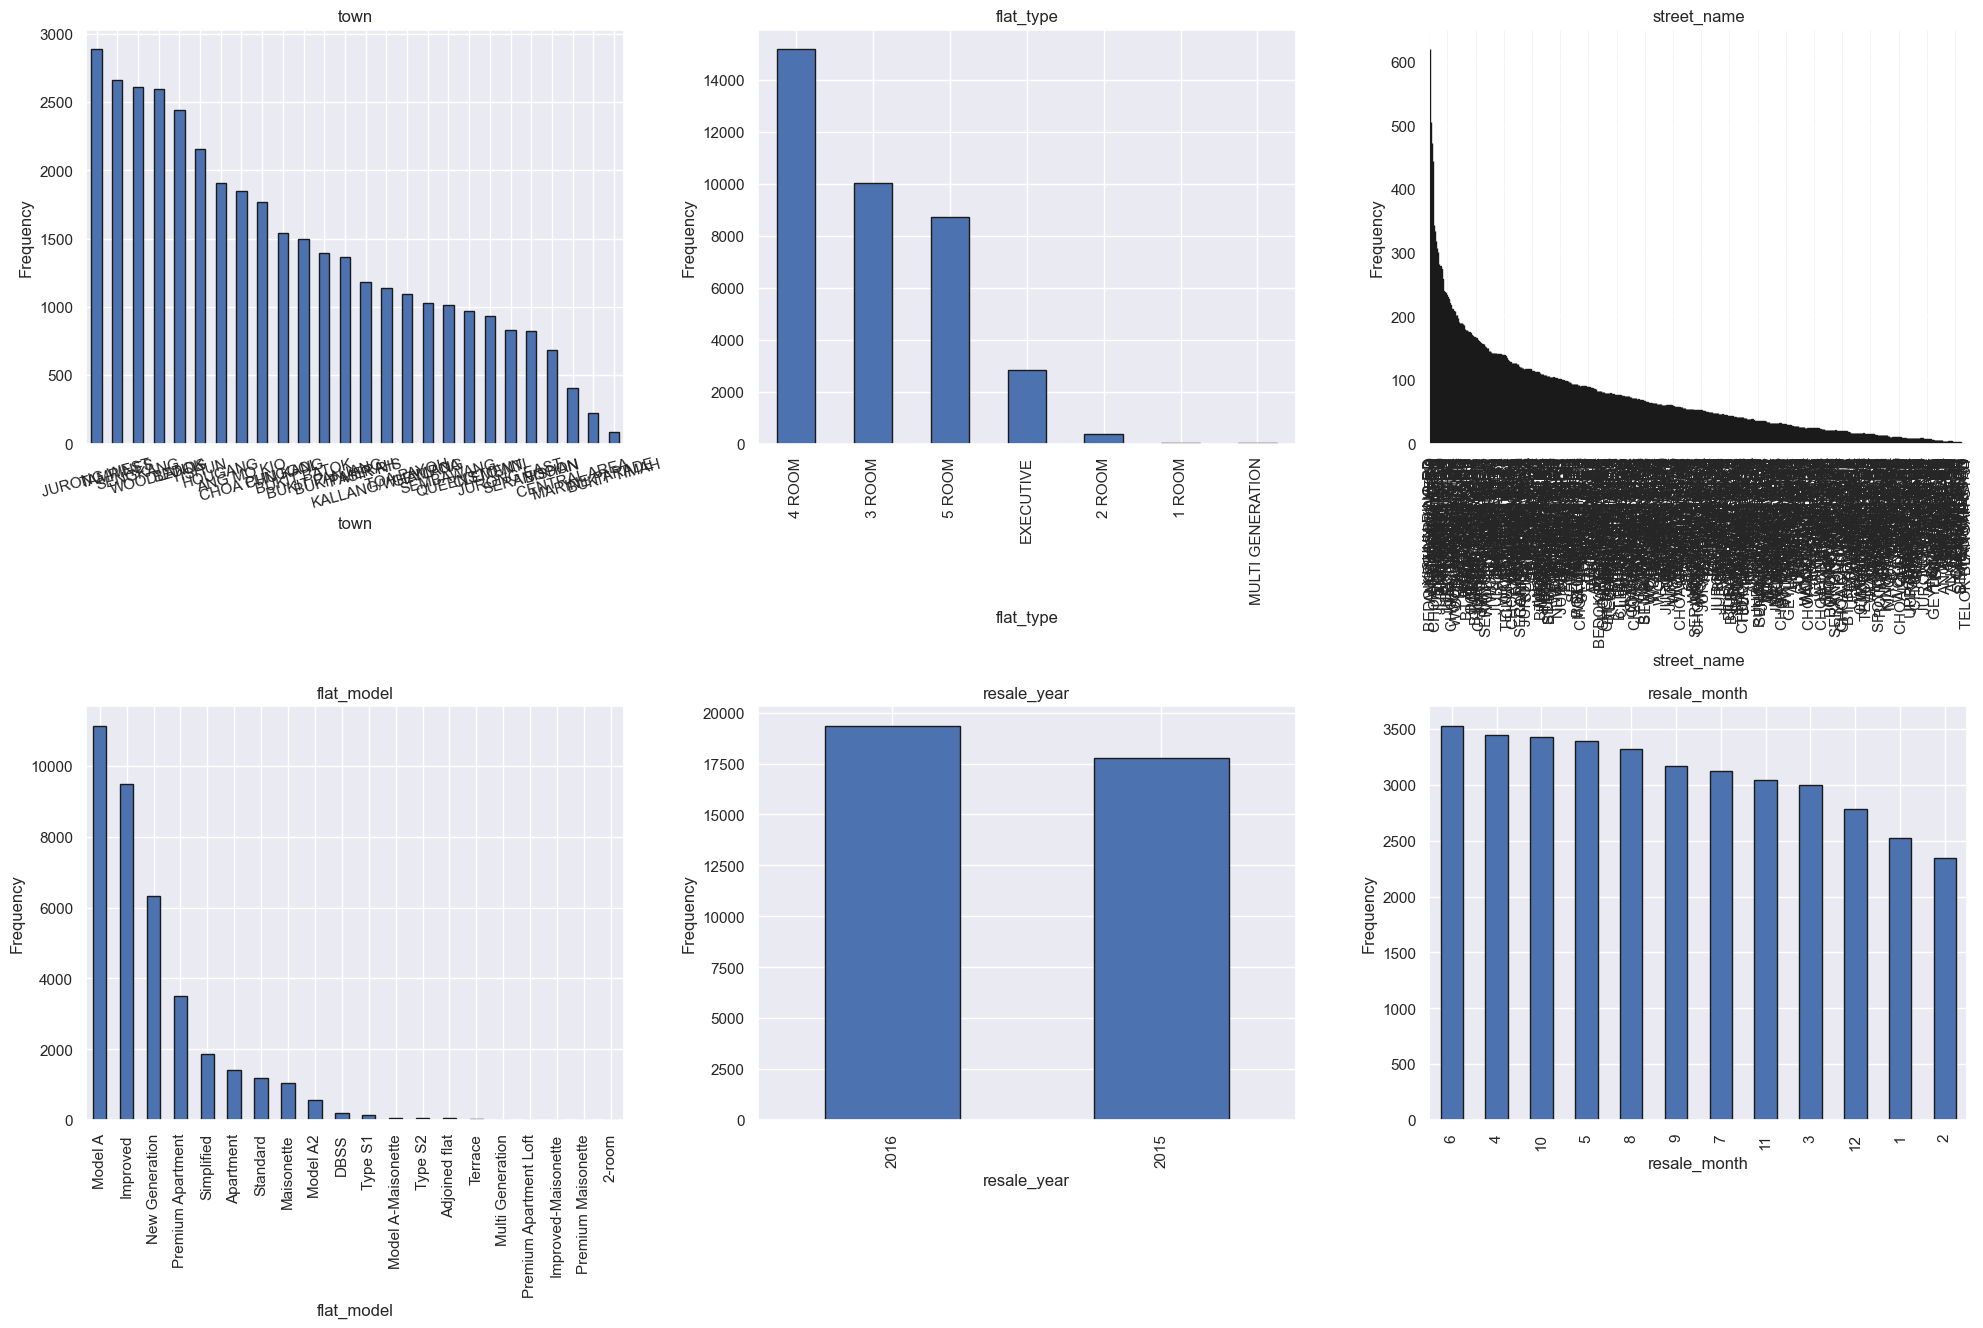

In [69]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Feature Vs Target (Categorical Data )

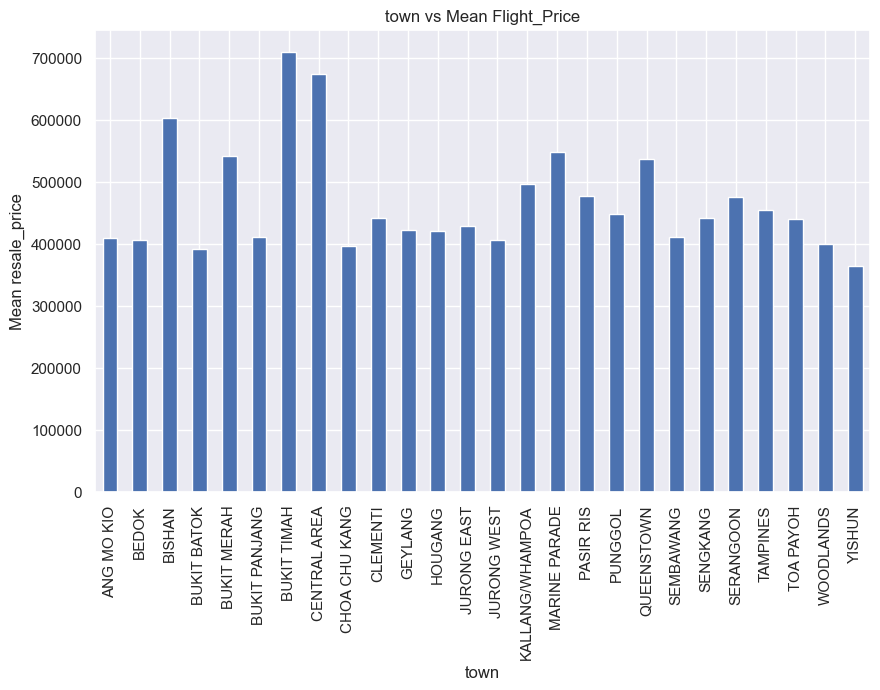

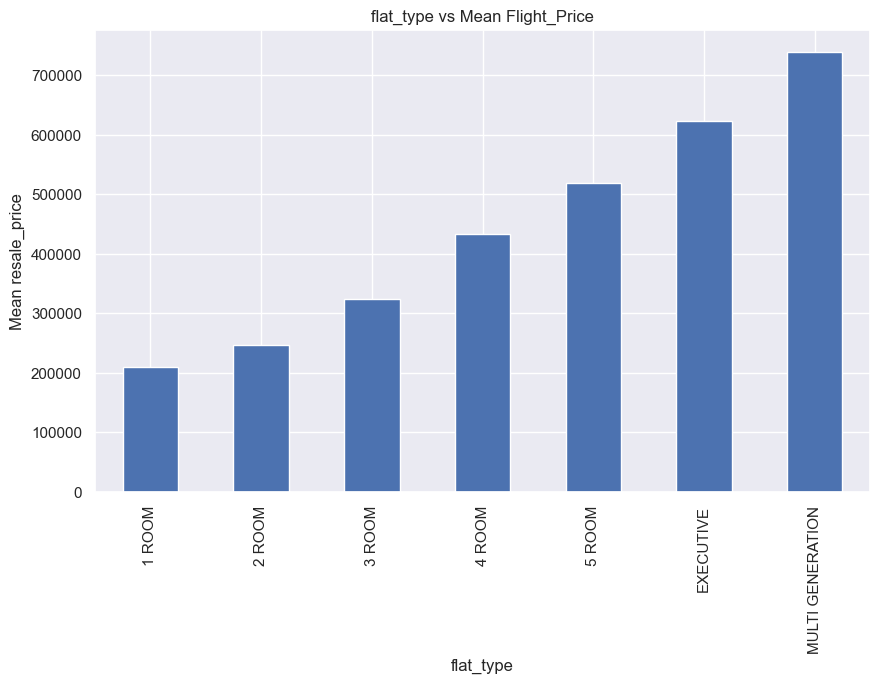

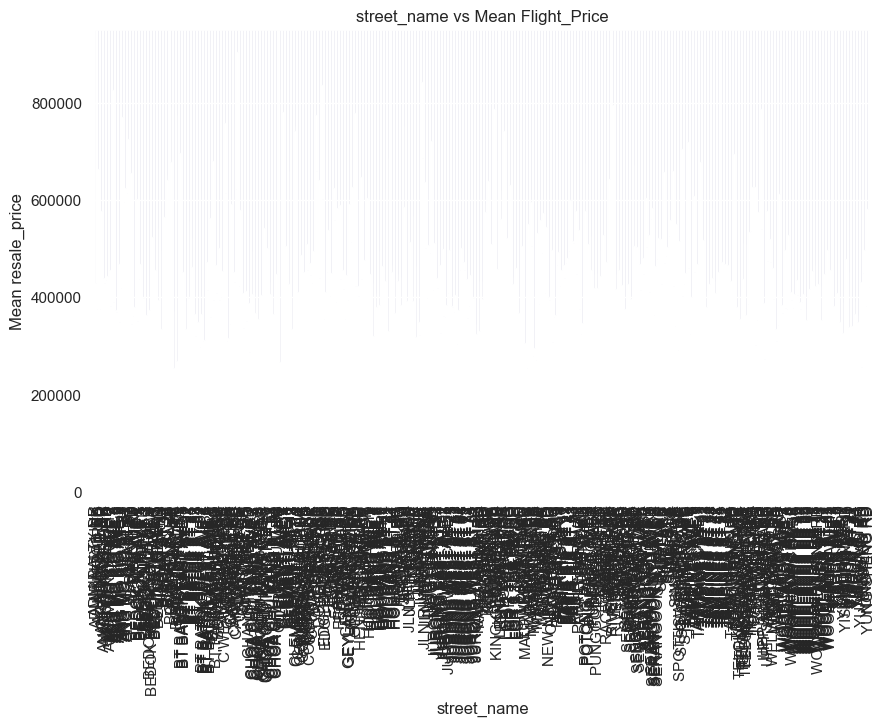

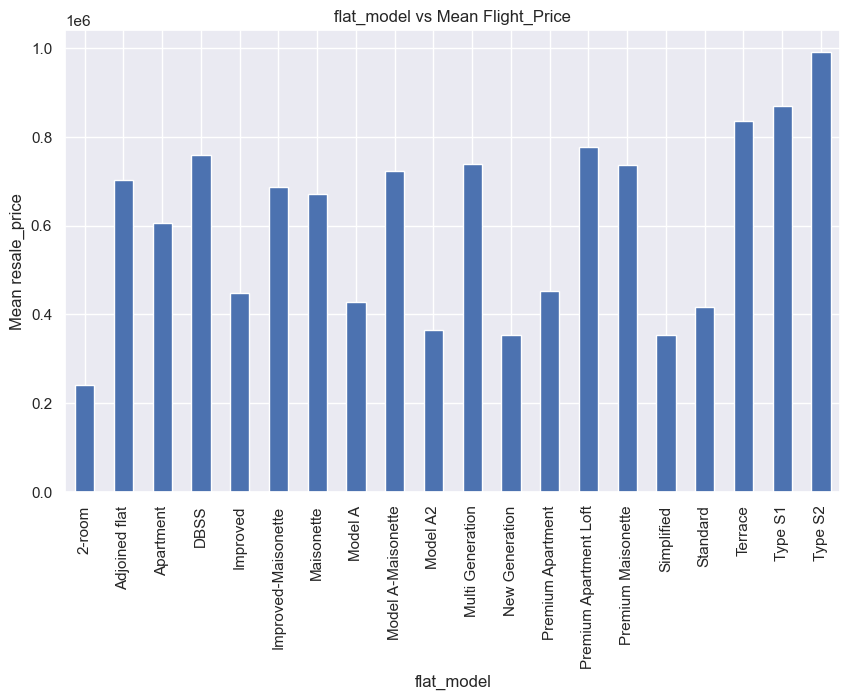

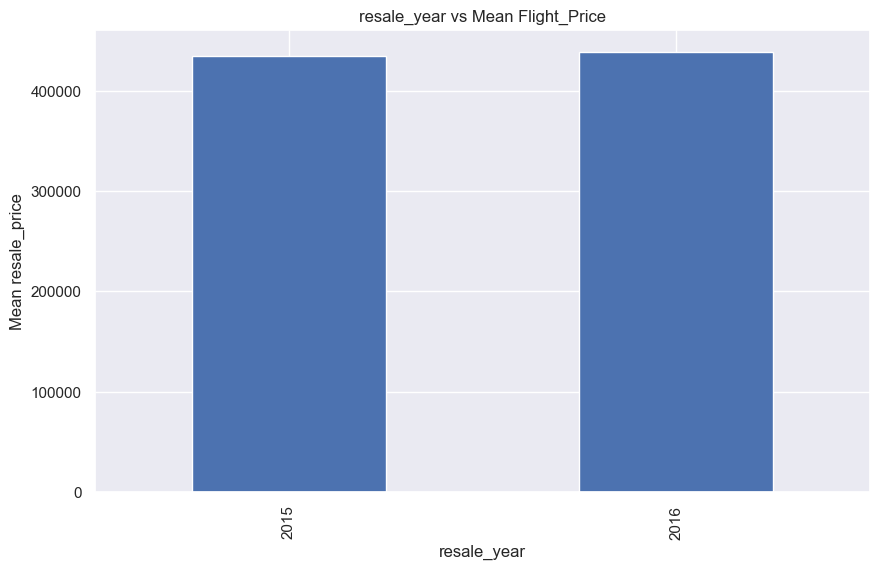

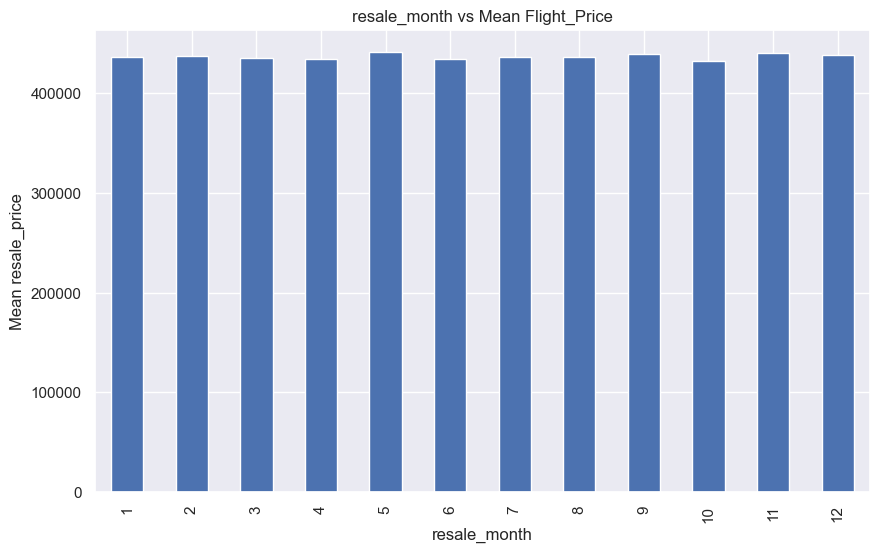

In [70]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

## Feature Vs Target (Condinues Data )

In [71]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price']

In [72]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'remaining_lease',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

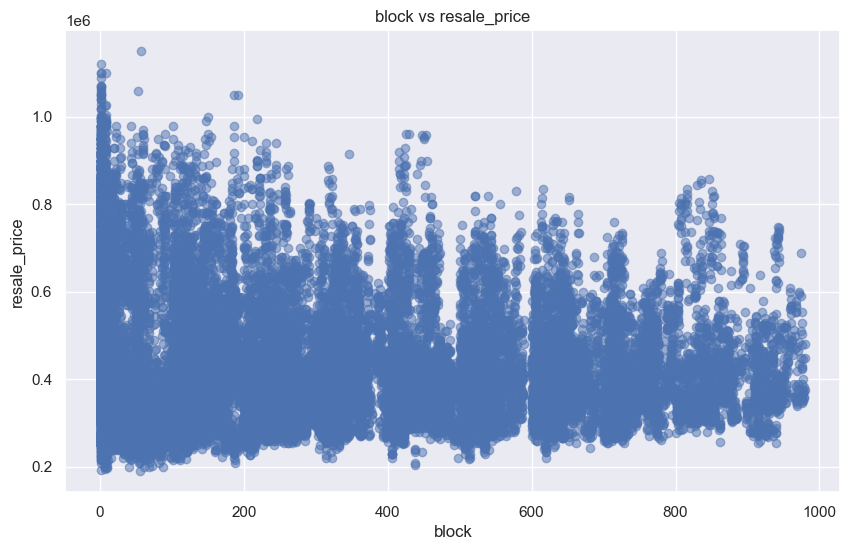

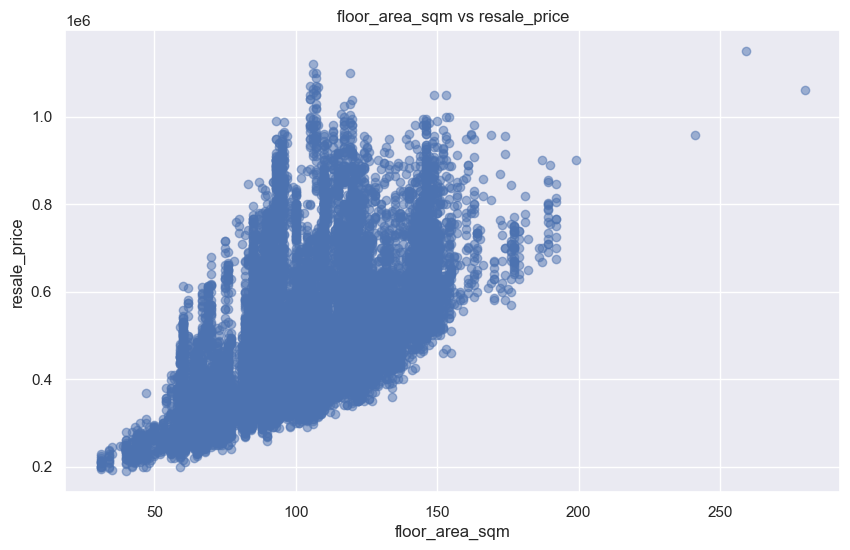

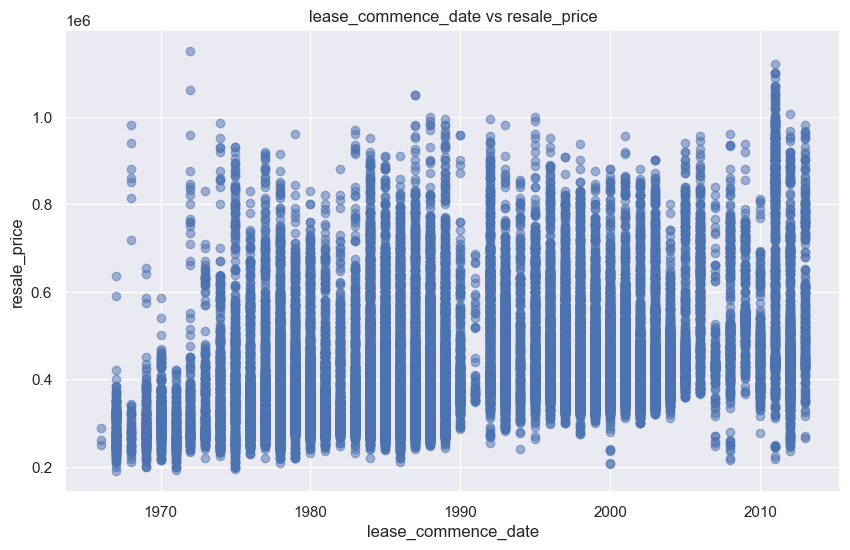

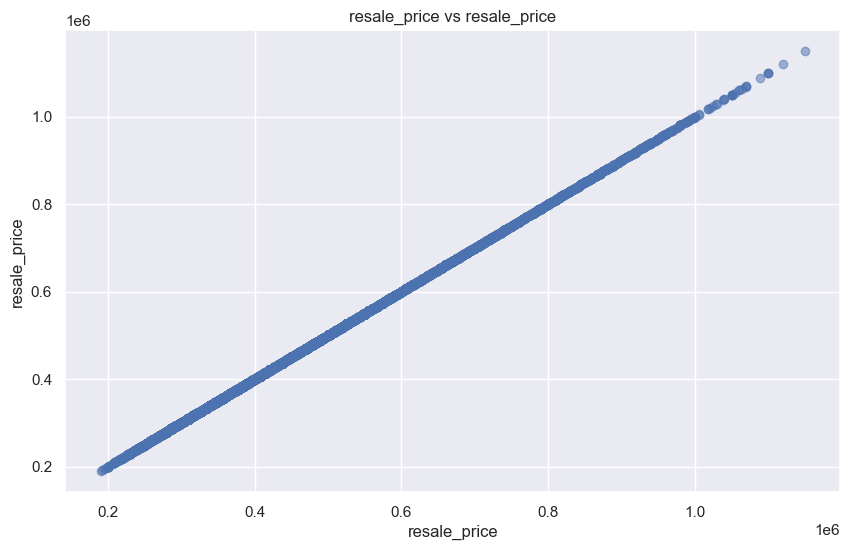

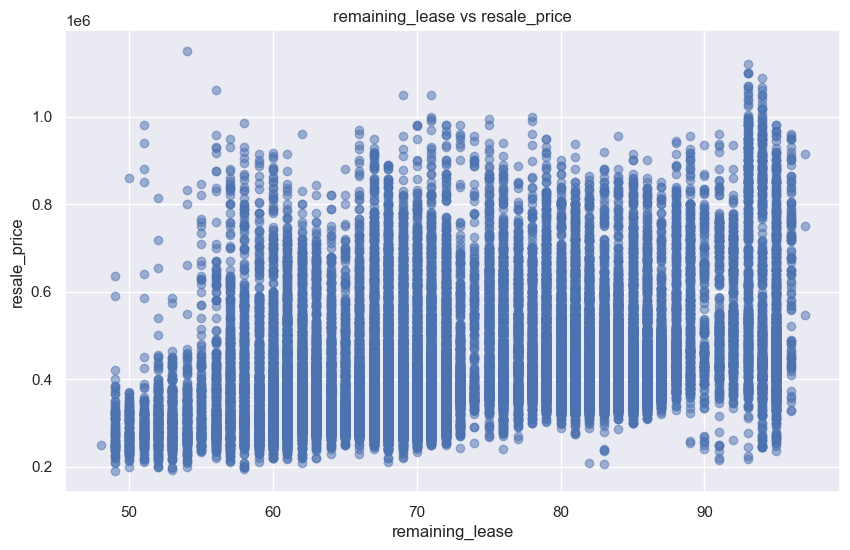

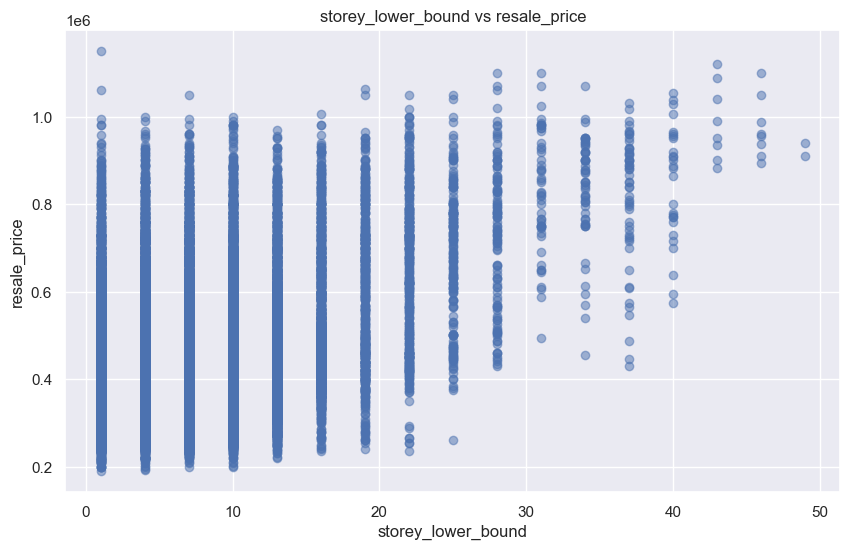

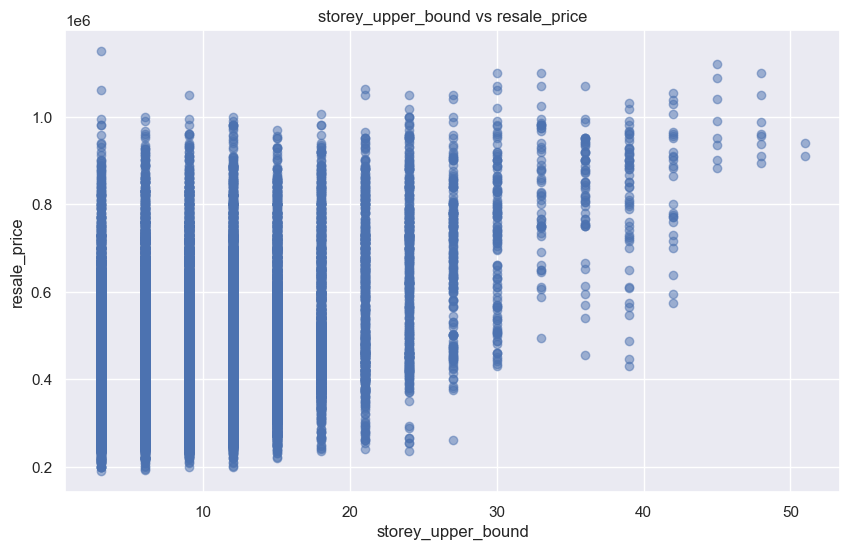

In [73]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

## Encoding Categorical Variables

In [74]:
#using encoding make a copy
copyd3=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [75]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [76]:
# list unique street names
streets = copyd3['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 4': 1,
 'ANG MO KIO AVE 10': 2,
 'ANG MO KIO AVE 5': 3,
 'ANG MO KIO AVE 8': 4,
 'ANG MO KIO AVE 1': 5,
 'ANG MO KIO AVE 3': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO ST 52': 8,
 'ANG MO KIO ST 21': 9,
 'ANG MO KIO ST 31': 10,
 'BEDOK RESERVOIR RD': 11,
 'BEDOK STH RD': 12,
 'BEDOK NTH ST 3': 13,
 'BEDOK NTH AVE 1': 14,
 'BEDOK NTH RD': 15,
 'NEW UPP CHANGI RD': 16,
 'CHAI CHEE ST': 17,
 'BEDOK NTH ST 1': 18,
 'BEDOK NTH AVE 4': 19,
 'BEDOK NTH ST 2': 20,
 'CHAI CHEE AVE': 21,
 'BEDOK NTH AVE 3': 22,
 'BEDOK STH AVE 1': 23,
 'BEDOK CTRL': 24,
 'BEDOK NTH AVE 2': 25,
 'BEDOK STH AVE 2': 26,
 'BEDOK RESERVOIR VIEW': 27,
 'CHAI CHEE RD': 28,
 'JLN TENAGA': 29,
 'BEDOK STH AVE 3': 30,
 'LENGKONG TIGA': 31,
 'SHUNFU RD': 32,
 'BISHAN ST 24': 33,
 'BISHAN ST 12': 34,
 'BISHAN ST 22': 35,
 'BISHAN ST 13': 36,
 'BISHAN ST 23': 37,
 'BRIGHT HILL DR': 38,
 'SIN MING AVE': 39,
 'BT BATOK ST 52': 40,
 'BT BATOK WEST AVE 4': 41,
 'BT BATOK WEST AVE 2': 42,
 'BT BATOK EAST AVE 4': 43,

In [77]:
# alter the column with the mapped numbers
copyd3['street_name'] = copyd3['street_name'].map(streets_mapping)

# Display the DataFrame
copyd3.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,3 ROOM,174.0,1,60.0,Improved,1986,70,255000.0,2015,1,7,9
1,ANG MO KIO,3 ROOM,541.0,2,68.0,New Generation,1981,65,275000.0,2015,1,1,3


In [78]:
copyd3['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI GENERATION'], dtype=object)

In [79]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
copyd3['flat_type'] =copyd3['flat_type'].map(category_mapping)

# Display the DataFrame
copyd3.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,3,174.0,1,60.0,Improved,1986,70,255000.0,2015,1,7,9
1,ANG MO KIO,3,541.0,2,68.0,New Generation,1981,65,275000.0,2015,1,1,3


In [80]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
copyd3['flat_model'] =copyd3['flat_model'].map(flat_model_mapping)

# Display the DataFrame
copyd3.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,3,174.0,1,60.0,14,1986,70,255000.0,2015,1,7,9
1,ANG MO KIO,3,541.0,2,68.0,15,1981,65,275000.0,2015,1,1,3
2,ANG MO KIO,3,163.0,1,69.0,15,1980,64,285000.0,2015,1,1,3


In [81]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
copyd3['town'] = copyd3['town'].map(town_mapping)

# Display the DataFrame
copyd3.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,3,174.0,1,60.0,14,1986,70,255000.0,2015,1,7,9
1,1,3,541.0,2,68.0,15,1981,65,275000.0,2015,1,1,3
2,1,3,163.0,1,69.0,15,1980,64,285000.0,2015,1,1,3
3,1,3,446.0,2,68.0,15,1979,63,290000.0,2015,1,1,3


In [82]:
# save the processed data for the deployment
copyd3.to_csv('final.csv')

# Correlation

In [83]:
# correlation matrix (ranges from 1 to -1)
corrm=copyd3.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.237852,0.029439,0.665630,0.220224,0.179790,0.351781,0.353877,-0.040909,0.011375,0.000833,-0.018031,-0.018031
flat_type,0.237852,1.000000,0.065888,0.145917,0.945289,0.228931,0.439256,0.440279,0.659448,0.011721,0.007741,0.087577,0.087577
block,0.029439,0.065888,1.000000,-0.018634,0.147746,-0.071052,-0.096773,-0.093065,-0.134712,-0.016075,-0.009449,-0.164205,-0.164205
street_name,0.665630,0.145917,-0.018634,1.000000,0.141945,0.096604,0.194850,0.195450,0.020244,0.016460,0.013267,-0.027641,-0.027641
floor_area_sqm,0.220224,0.945289,0.147746,0.141945,1.000000,0.180497,0.387820,0.389355,0.658001,0.010934,0.006028,0.041156,0.041156
flat_model,0.179790,0.228931,-0.071052,0.096604,0.180497,1.000000,0.408827,0.406783,0.220362,0.019808,0.004616,0.117452,0.117452
lease_commence_date,0.351781,0.439256,-0.096773,0.194850,0.387820,0.408827,1.000000,0.997929,0.360033,0.051972,0.015137,0.257409,0.257409
remaining_lease,0.353877,0.440279,-0.093065,0.195450,0.389355,0.406783,0.997929,1.000000,0.358972,0.006929,-0.010220,0.254731,0.254731
resale_price,-0.040909,0.659448,-0.134712,0.020244,0.658001,0.220362,0.360033,0.358972,1.000000,0.014965,0.003109,0.371611,0.371611
resale_year,0.011375,0.011721,-0.016075,0.016460,0.010934,0.019808,0.051972,0.006929,0.014965,1.000000,-0.011968,0.016351,0.016351


# Heatmap

<Axes: >

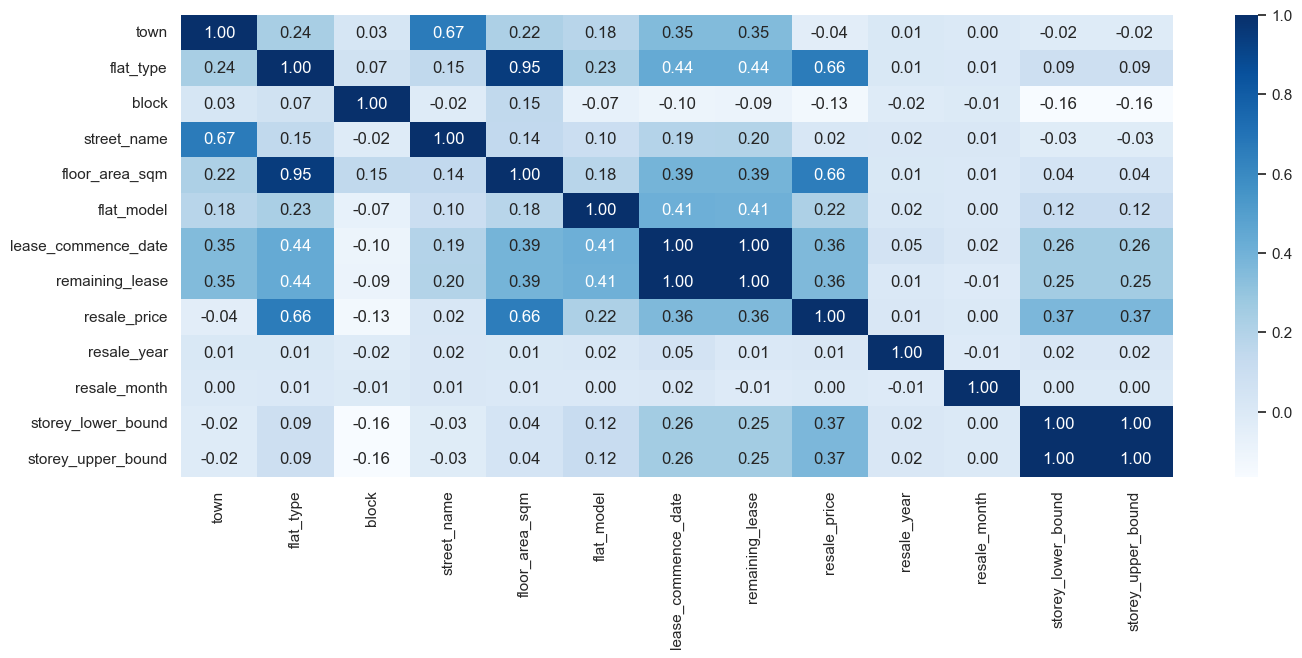

In [84]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

# RIGHT TO MACHINE LEARNING

## Split

In [85]:
# assign feature and target variable
X = copyd3.drop('resale_price', axis= 1)
y = copyd3['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [86]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(29681, 12) (7421, 12) (29681,) (7421,)


## Scalling

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 0.61705433, -1.19964598,  0.58920155, ...,  1.62011796,
         -0.03000737, -0.03000737],
        [-0.7909584 , -1.19964598, -0.94550374, ..., -1.09963375,
          0.53298178,  0.53298178],
        [-0.91895955, -1.19964598, -0.93419142, ...,  1.01572869,
         -0.03000737, -0.03000737],
        ...,
        [-1.30296302, -0.10852067, -0.27430585, ..., -0.19304985,
          1.09597094,  1.09597094],
        [ 0.87305664, -1.19964598, -0.92664987, ..., -0.79743911,
          0.53298178,  0.53298178],
        [ 0.48905317,  0.98260464,  0.19704099, ...,  0.71353406,
         -0.59299653, -0.59299653]]),
 array([[ 1.0010578 , -0.10852067,  1.98815896, ...,  0.41133942,
          0.53298178,  0.53298178],
        [-1.55896534, -1.19964598, -0.93796219, ...,  0.10914479,
         -0.59299653, -0.59299653],
        [-1.68696649, -0.10852067, -1.03600233, ..., -0.49524448,
         -1.15598569, -1.15598569],
        ...,
        [-1.68696649,  0.98260464,  0.29131035, ..., -

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Model_Fit

## Linear Regression

In [89]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[351159.26034334 335808.0930248  436463.34927588 ... 699371.90127479
 593063.58084033 336024.36669271]
30797    335000.0
8770     300000.0
5439     536000.0
18268    317000.0
17524    570000.0
           ...   
20296    340000.0
19915    528888.0
1313     720000.0
6688     600000.0
20355    293000.0
Name: resale_price, Length: 7421, dtype: float64


In [90]:
linear_model.score(X_test, y_test)

0.6338919817150037

In [91]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.6290930729165236

## K Nearest Neighbor Regression

In [92]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 40276.98241530791
Mean Squared Error (MSE)     : 3933892001.2713566
Root Mean Square Error (RMSE): 62720.74617916592
R-squared (R2) Score         : 0.7869953183895921


## Decision Tree Regression

In [93]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 23931.863088442613
Mean Squared Error (MSE)     : 1403311552.4115617
Root Mean Square Error (RMSE): 37460.80021050754
R-squared (R2) Score         : 0.9240162337133228


## Random Forest Regression

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 18749.16322162974
Mean Squared Error (MSE)     : 781923905.8940969
Root Mean Square Error (RMSE): 27962.90231528367
R-squared (R2) Score         : 0.9576619153335395


## Xg Boost Regression

In [95]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 19262.554279999324
Mean Squared Error (MSE)     : 739203961.7568282
Root Mean Square Error (RMSE): 27188.30560658071
R-squared (R2) Score         : 0.9599750312239688


## Finalizeing Models

In [96]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.7869953183895921
DecisionTreeRegressor 0.9240162337133228
RandomForestRegressor 0.9576619153335395
XGBRegressor 0.9599750312239688

Model: XGBRegressor contain Maximum R2_Score: 0.9599750312239688 


## Suggestion

In [97]:
rf_regressor.feature_importances_

array([0.15136882, 0.01705213, 0.03841638, 0.06279119, 0.47763205,
       0.05273189, 0.05856552, 0.02389072, 0.00193117, 0.00757302,
       0.05340483, 0.0546423 ])

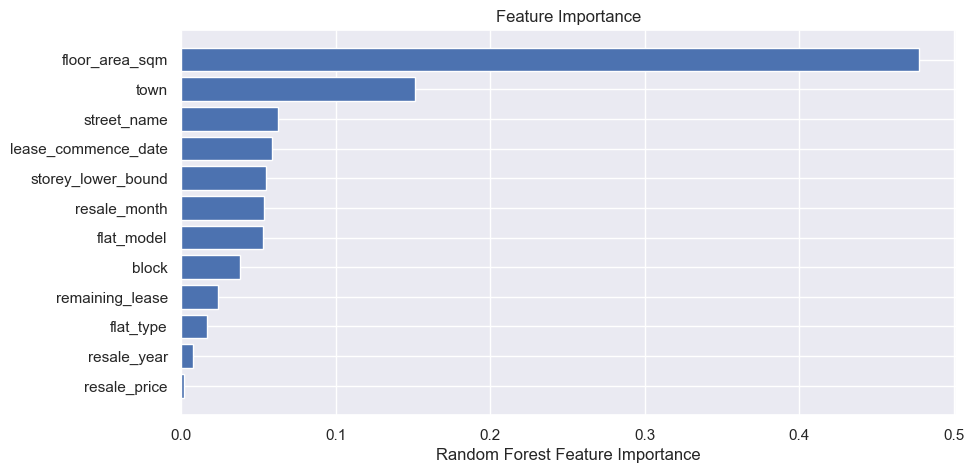

In [98]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(copyd3.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()


# Save the model

In [99]:
model=rf_regressor.fit(X_train, y_train)

In [100]:
model

RandomForestRegressor(random_state=42)

In [101]:
from joblib import dump

# Save the model to disk using joblib
filename = 'RandomFRegressor_model.joblib'
dump(model, filename)
print(f"Saved {filename} model to disk")


Saved RandomFRegressor_model.joblib model to disk


## Predicting

In [102]:
# get sample to predict the resale price
pre_df =copyd3.sample(n=5)
pre_df
     

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
55,1,5,306.0,5,123.0,17,1977,61,650000.0,2015,1,13,15
28801,21,4,767.0,343,90.0,16,2003,86,338000.0,2016,7,13,15
3151,26,4,257.0,222,106.0,16,1993,77,390000.0,2015,3,4,6
11951,25,4,230.0,88,107.0,16,1988,72,340000.0,2015,9,1,3
22493,9,4,601.0,120,92.0,15,1979,62,450000.0,2016,4,10,12


In [103]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

## Resale Price

In [104]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([651178.88, 342660.  , 394271.76, 329220.52, 458850.  ])